In [12]:
import pandas as pd
import numpy as np
from helper import *

In [13]:
sales_df = pd.read_excel('SAAS - Sales Data - Proactiv 10-1-21.xlsx')

In [14]:
sales_df_cleaned = clean_sales(sales_df, "SALES DATA", granularity=True)

COLUMNS of SALES DATA: ['Country' 'Day' 'Visits' 'Orders' 'Order Rate' 'Revenue']
If SALES DATA has more than one country that you'd like to segment and analyze separately, type the name of the column
If not, type NONE in that exact format


[column-name/NONE] Country


Which column corresponds to the day


[column-name] Day


Which column corresponds to the target/response/dependent variable? In most cases, this will be REVENUE or something similar


[column-name] Revenue


In [16]:
ad_df = pd.read_excel('SAAS - Ad Data - Proactiv 10-1-21.xlsx')

In [17]:
data_dict = clean_and_merge(ad_df, sales_df_cleaned)

['Day' 'Country' 'Channel' 'Publisher' 'Media Objective' 'Audience'
 'Ad Type' 'Media Cost*' 'Impressions' 'Clicks' 'Orders']


What column corresponds to the country column in the ad data? Country
What column corresponds to the media cost column in the ad data? Media Cost*
What column corresponds to the impressions column in the ad data? Impressions


US
PROCESSING US
MERGE SUCCESS for US
Canada
PROCESSING Canada
MERGE SUCCESS for Canada


In [28]:
data_dict['US'].to_csv('original_dataset_proactiv.csv')

In [18]:
for key in data_dict:
    data_dict[key].columns = [re.sub('[^0-9a-zA-Z_=.]+', '', col) for col in data_dict[key].columns]

In [19]:
possible_countries = data_dict.keys()
print("Possible Countries to choose from", list(possible_countries))
country = "US"
target = 'Revenue'

Possible Countries to choose from ['US', 'Canada']


In [27]:
#data_matrix = apply_transformations(data_dict, country=country, response_var=target)

In [22]:
#data_matrix.to_csv('transformed_dataset_proactiv.csv')

model=Ridge(alpha=1e-05, positive=True) train_r2=0.659515973000789 validation_r2=0.4487270575225344


/Users/sarangmdeshpande/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


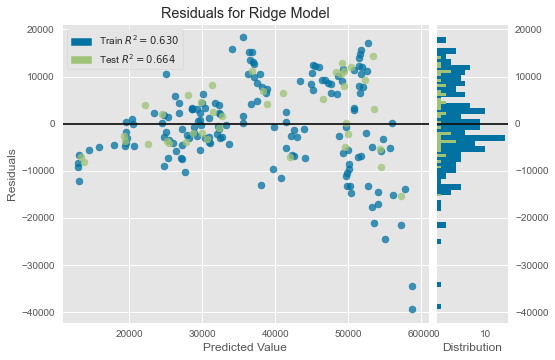

In [33]:
x, y = prep_additive_model(data_matrix.fillna(0), target)
x = x[get_media_vars(x)]
model = ridge_regression(x, y)

In [34]:
model.coef_

array([2.46538171e+01, 1.03919203e+02, 0.00000000e+00, 6.26124244e+01,
       1.68132077e+02, 5.88054997e+01, 3.97262842e+00, 0.00000000e+00,
       8.71137860e+03])